<a href="https://colab.research.google.com/github/ahcamachod/1922-clustering-kmeans-dbscan-meanshift/blob/main/clustering_kmeans_dbscan_meanshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering: KMeans, DBSCAN y Mean Shift**

En este notebook estaremos ejecutando diversos métodos para la clusterización de datos.

Utilizaremos una base de datos disponible en Kaggle llamada *Customer Personality Analysis*.

El dataset utilizado se puede acceder en el siguiente link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

### **Procedimientos:**
1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab
2. Importar bibliotecas de los métodos a utilizar
3. Cargar el dataset en un DataFrame
4. Consultar información sobre las variables del Dataframe
5. Preprocesamiento:
    - Eliminar variables innecesarias o que no permitan leer el dataframe
    - Tratamiento de variables con valores faltantes
    - Tratamiento de datos extremos y datos atípicos
    - Normalizar los valores de todas las variables
6. Ejemplo básico de entrenamiento de un modelo
    - Definir los feactures
    - Elegimos el modelo
    - Probamos el modelo
    - Probamos la exactitud del modelo
    - Calculamos taza de aciertos
7. Entrenamiento de modelo con muestras de pruebas proporcionales
    - Estratificación proporcional de las muestras de entrada
8. Estimador lineal para un dataset de cumplimento de entrega de proyectos
9. Estimador no lineal
10. Dummy classifiers y Árboles de decisión
    - El clasificador Dummy
    - Arbol de decisión con y sin datos estandarizados
    - Diagrama de árbol de decisión y sus parámetros

### **1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# pip install -r "/ruta del archivo en Google drive/requirements.txt"

In [3]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore')

### **2. Importar bibliotecas de los métodos a utilizar**

In [31]:
# Las versiones de las bibliotecas que usaremos son las siguientes:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# pip: pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

print(f'matplotlib --> {matplotlib.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'numpy --> {np.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'sklearn --> {sklearn.__version__}')

matplotlib --> 3.7.1
pandas --> 1.5.3
numpy --> 1.23.5
seaborn --> 0.12.2
sklearn --> 1.2.2


### **3. Cargar el dataset en un dataframe**

In [5]:
ruta= '/content/drive/MyDrive/Colab Notebooks/231120-1_clustering_k_means_dbscan_mean_shift/datasets/marketing_campaign.csv'
datos_clientes_marketing_df = pd.read_csv(ruta, sep = "\t")
# Obervación: el separador de columnas es \t

### **4. Consultar información sobre las variables del Dataframe**

In [ ]:
# datos_clientes_marketing_df.head()

In [7]:
datos_clientes_marketing_df.shape

(2240, 29)

In [8]:
datos_clientes_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Aula 1

### 1.2 Importando los datos

### 1.3 Analizando y transformando los datos

In [9]:
columnas = {'Year_Birth':'Ano_Nacimiento', 'Education':'Escolaridad', 'Marital_Status':'Estado_Civil',
            'Income':'Renta_Anual', 'Kidhome':'CtNinos','Teenhome':'CtAdolescentes', 'Dt_Customer':'Primera_Compra',
            'Recency':'Recencia', 'MntWines':'GastoVinos', 'MntFruits':'GastoFrutas','MntMeatProducts':'GastoCarnes',
            'MntFishProducts':'GastoPescado', 'MntSweetProducts':'GastoGolosinas','MntGoldProds':'GastoOro',
            'NumDealsPurchases':'NumComprasConDescuento', 'NumWebPurchases':'NumComprasOnline',
            'NumCatalogPurchases':'NumComprasCatalogo', 'NumStorePurchases':'NumComprasTienda',
            'NumWebVisitsMonth':'NumVisitasOnlineMes','Z_CostContact':'CostoContacto','Z_Revenue':'Ingresos','AcceptedCmp3':'AceptaCmp3', 'AcceptedCmp4':'AceptaCmp4',
            'AcceptedCmp5':'AceptaCmp5', 'AcceptedCmp1':'AceptaCmp1', 'AcceptedCmp2':'AceptaCmp2',
            'Complain':'Quejas','Response':'AceptaCmpActual'}

**Clientes**

*ID*: Identificación única del cliente.

*Ano_Nacimiento*: Año de nacimiento del cliente.

*Escolaridad*: Nivel educativo del cliente.

*Estado_Civil*: Estado civil del cliente.

*Renta_Anual*: Renta anual del cliente.

*CtNinos*: Número de niños en el hogar.

*CtAdolescentes*: Número de adolescentes en el hogar.

*Primera_Compra*: Fecha en que compró por primera vez

*Recencia*: Hace cuántos días realizó la última compra.

*Quejas*: 1 si el cliente se quejó en los últimos 2 años, 0 en otro caso.

**Productos**

*GastoVinos*: Gasto en vinos en los últimos 2 años.

*GastoFrutas*: Gasto en frutas en los últimos 2 años.

*GastoCarnes*: Gasto en carne en los últimos 2 años.

*GastoPescado*: Gasto en pescado en los últimos 2 años.

*GastoGolosinas*: Gasto en golosinas en los últimos 2 años.

*GastoOro*: Gasto en productos de oro en los últimos 2 años.

**Promociones**

*NumComprasConDescuento*: Número de compras con descuento.

*AceptaCmp1*: 1 si el cliente aceptó la oferta en la primera campaña, 0 en otro caso.

*AceptaCmp2*: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en otro caso.

*AceptaCmp3*: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en otro caso.

*AceptaCmp4*: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en otro caso.

*AceptaCmp5*: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en otro caso.

*AceptaCmpActual*: 1 si el cliente aceptó la oferta en la última campaña, 0 en otro caso.

**Compras**

*NumComprasOnline*: Número de compras realizadas en la página web.

*NumComprasCatalogo*: Número de compras realizadas a través del catálogo.

*NumComprasTienda*: Número de compras realizadas en la tienda.

*NumVisitasOnlineMes*: Número de visitas realizadas a la página web.

In [10]:
datos_clientes_marketing_df = datos_clientes_marketing_df.rename(columns = columnas)

In [21]:
datos_clientes_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2216 non-null   int64  
 1   Ano_Nacimiento          2216 non-null   int64  
 2   Escolaridad             2216 non-null   object 
 3   Estado_Civil            2216 non-null   object 
 4   Renta_Anual             2216 non-null   float64
 5   CtNinos                 2216 non-null   int64  
 6   CtAdolescentes          2216 non-null   int64  
 7   Primera_Compra          2216 non-null   object 
 8   Recencia                2216 non-null   int64  
 9   GastoVinos              2216 non-null   int64  
 10  GastoFrutas             2216 non-null   int64  
 11  GastoCarnes             2216 non-null   int64  
 12  GastoPescado            2216 non-null   int64  
 13  GastoGolosinas          2216 non-null   int64  
 14  GastoOro                2216 non-null   

**Valores nulos:**

In [ ]:
datos_clientes_marketing_df.isna().sum()

In [11]:
nulos= 24/2240
print(f'porcentaje de registros con valores nulos es de {np.round(nulos*100,2)} %')

porcentaje de registros con valores nulos es de 1.07 %


Como las filas con datos nulos es de aprox 1% podemos simplemente eliminarlas pero generalmente el tratamiento de datos nulos es otro proceso de análisis y trasnformaciones.

In [11]:
datos_clientes_marketing_df.dropna(axis = 0, inplace = True)

In [ ]:
# datos_clientes_marketing_df.isna().sum()

**Correlación entre variables:**

In [ ]:
# Consultamos la matriz de correlación de las variables para observar la relación entre pares de variables
matriz_correlaciones = datos_clientes_marketing_df.corr()
# matriz_correlaciones

Con la matriz de correlación tenemos una idea de la correlación entre pares de variables.
- Valore sercanos a uno (1) indican correlación directamente proporcional entre el par (cuando una de las variables crece la otra tambien crece).
- Valores sercanos a menos uno (-1) indican correlación inversamente proporcional entre el par (cuando una crece la otra variable decrece)
- Valores sercanos a cero (0) indican que no hay correlación entre las dos variables.

In [ ]:
# Como la tabla anterior no es sencilla de observar por la gran cantidad de variables usamos un diagrama  que simplifique la observación
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,12))
grafico_correlacion = sns.heatmap(matriz_correlaciones, cmap = 'Blues', annot = True)

In [14]:

datos_clientes_marketing_df.CostoContacto.value_counts()

3    2216
Name: CostoContacto, dtype: int64

In [ ]:
datos_clientes_marketing_df.Ingresos.value_counts()

11    2216
Name: Ingresos, dtype: int64

**CostoContacto** e **Ingresos** tienen valores contantes por eso aparecen en blanco, por lo tanto son candidatos a ser eliminadas por no aportar niguna información útil. Tampoco la variable idCliente aporta información útil así que es otra variable candidata a ser eliminada del dataframe.

### 1.4 Selección de atributos

In [36]:
X = datos_clientes_marketing_df.drop(columns = ['ID','CostoContacto','Ingresos', 'Primera_Compra', 'Quejas', 'Escolaridad', 'Estado_Civil'], axis =1)
# X.head()

In [37]:
# La variable año de nacimiento no es tan útil como por ejemplo la edad del cliente, por eso realizamos la siguiente transformación
from datetime import datetime
anno_actual = datetime.today().year
X['Edad'] = anno_actual - datos_clientes_marketing_df.Ano_Nacimiento
X.drop(columns = ['Ano_Nacimiento'], axis = 1, inplace = True)
# X.head()

(0.0, 150000.0)

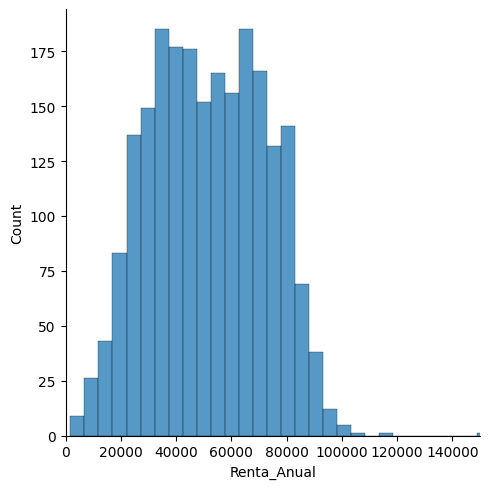

In [17]:
sns.displot(datos_clientes_marketing_df.Renta_Anual)
plt.xlim(0, 150000) # Ajustamos el limite horizontal del grafico para una mejor presentación

Observamos que la variable Ingresos posee una distribución normal, y podemos seguir analizando mas variables pero el objetivo de este proyecto es solo enfocarnos en crear closters y no se requiere analizar y trasnformar todas las varibles involucradas.

### 1.5 Normalización

La normalización es la transformación de los valores de variables cuantitativas a valores entre 0 y 1, con el fin de que rangos de valores distintos no alteren los cálculos. Vamos a normalizar primero paso a paso para entender el proceso y luego usando librerias

In [34]:
# Normalizacion sin usar librerias
atributos = X.columns
X_normalizado = X.copy()
for atributo in atributos:
  X_normalizado[atributo] = (X[atributo] - min(X[atributo]))/(max(X[atributo]) - min(X[atributo]))
X_normalizado.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,1.0,0.378641
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.407767
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.300971
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.116505
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.145631


In [33]:
# Normalización usando libreria
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(X)
X_normalizado = pd.DataFrame(X_normalizado, columns = X.columns)
X_normalizado.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,1.0,0.378641
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.407767
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.300971
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.116505
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.145631


**Otros métodos para reescalar los datos:**

Existen diversos métodos posibles para reescalar los datos ya implementados en la biblioteca Scikit-learn, como por ejemplo el método StandardScaler().

Este método escala nuestros datos, sustrayendo el promedio de cada uno de los atributos y dividiendo entre el desvío típico, siguiendo la siguiente fórmula:

$$X_{std} = {X - mean \over sd}$$


In [39]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_std = standard_scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = X.columns)
X_std.head()

,Renta_Anual,CtNinos,CtAdolescentes,Recencia,GastoVinos,GastoFrutas,GastoCarnes,GastoPescado,GastoGolosinas,GastoOro,...,NumComprasCatalogo,NumComprasTienda,NumVisitasOnlineMes,AceptaCmp3,AceptaCmp4,AceptaCmp5,AceptaCmp1,AceptaCmp2,AceptaCmpActual,Edad
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,...,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,2.377952,0.986443
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,...,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.420530,1.236801
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,...,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.420530,0.318822
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,...,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.420530,-1.266777
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,...,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.420530,-1.016420


**Lo importante en esta sección:**

- Importar los datos;
- Visualizar el número de atributos y muestras de nuestros datos;
- Visualizar las primeras muestras de los datos;
- Extraer parámetros estadísticos básicos;
- Generar una matriz de correlación para verificar la relación entre los atributos;
- Normalizar el conjunto de datos.

## Aula 2

### 2.2 KMeans

### 2.3 Gráficando los clusters en 2D

### 2.4 Gráficando los clusters en 3D

### 2.5 Visualizando los centroides

## Aula 3

### 3.2 DBSCAN

### 3.3 Ajuste de hiperparámetros y visualización

## Aula 4

### 4.2 Mean Shift

### 4.3 Visualización de clusters

## Aula 5

### 5.1 Métrica para validación

### 5.3 Coeficiente de Silhouette para KMeans

### 5.4 Coeficiente de Silhouette para DBSCAN

### 5.5 Coeficiente de Silhouette para Mean Shift

### 5.6 Mejores configuraciones para la clusterización